In [16]:
import biosppy 
import numpy as np 
import pyhrv.tools as tools 
import pyhrv.time_domain as td  
import pyhrv.frequency_domain as fd 
import pyhrv.nonlinear as nl 
from opensignalsreader import OpenSignalsReader

In [17]:
# Load sample ECG signal & extract R-peaks using BioSppy 
signal_s1 = OpenSignalsReader('./subject_1.txt').signal('ECG') 
signal_s2 = OpenSignalsReader('./subject_2.txt').signal('ECG')
signal_s3 = OpenSignalsReader('./subject_3.txt').signal('ECG')
signal_s4 = OpenSignalsReader('./subject_4.txt').signal('ECG')
signal_s1, rpeaks_s1 = biosppy.signals.ecg.ecg(signal_s1, show=False)[1:3] 
signal_s2, rpeaks_s2 = biosppy.signals.ecg.ecg(signal_s2*(-1), show=False)[1:3] 
signal_s3, rpeaks_s3 = biosppy.signals.ecg.ecg(signal_s3*(-1), show=False)[1:3] 
signal_s4, rpeaks_s4 = biosppy.signals.ecg.ecg(signal_s4*(-1), show=False)[1:3] 


In [18]:
# Compute NNI 
nni_s1 = tools.nn_intervals(rpeaks_s1)
nni_s2 = tools.nn_intervals(rpeaks_s2)
nni_s3 = tools.nn_intervals(rpeaks_s3)
nni_s4 = tools.nn_intervals(rpeaks_s4)

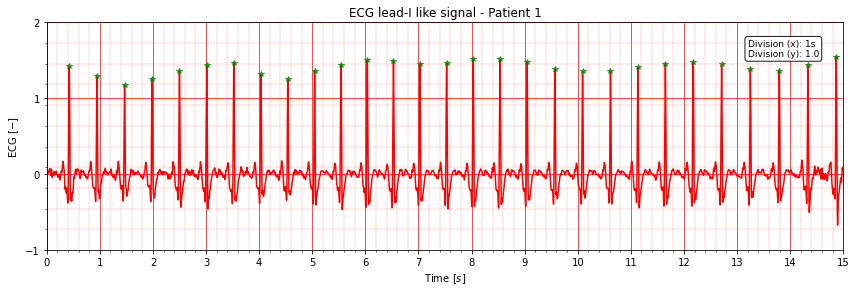

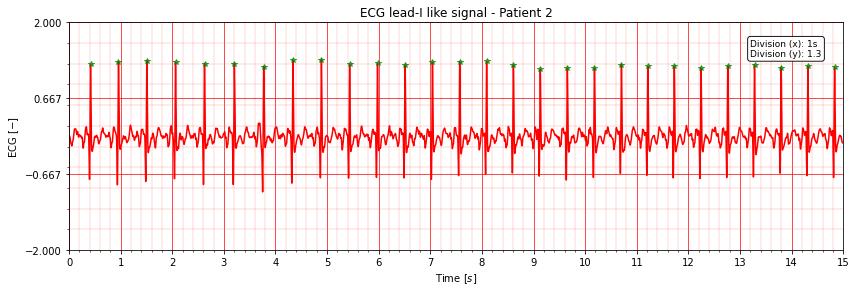

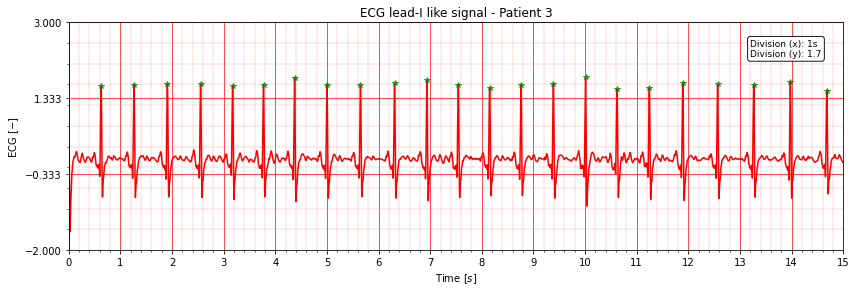

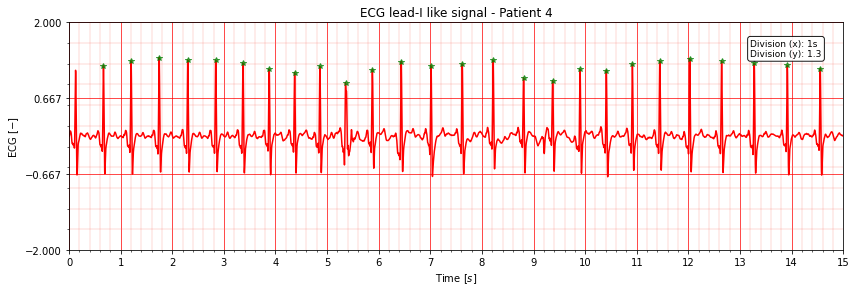

ReturnTuple(ecg_plot=<Figure size 864x288 with 1 Axes>)

In [19]:
# Plot the ECG signal (interval: 0s to 15s) 
tools.plot_ecg(signal_s1, interval=[0, 15], title = 'Patient 1')
tools.plot_ecg(signal_s2, interval=[0, 15], title = 'Patient 2')
tools.plot_ecg(signal_s3, interval=[0, 15], title = 'Patient 3')
tools.plot_ecg(signal_s4, interval=[0, 15], title = 'Patient 4')

C:\Users\Admin\miniconda3\lib\site-packages\pyhrv-0.4.0-py3.8.egg\pyhrv\time_domain.py:576: UserWarning: CAUTION: The TINN computation is currently providing incorrect results in the most cases due to a malfunction of the function. This function will be reviewed over the next updates to solve this issue
  warnings.warn('CAUTION: The TINN computation is currently providing incorrect results in the most cases due to a '


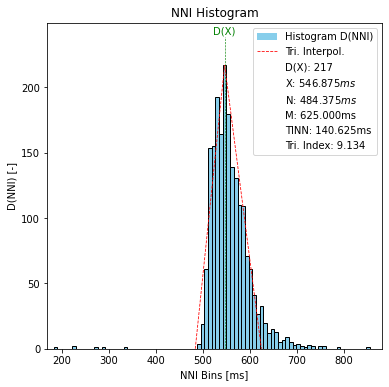

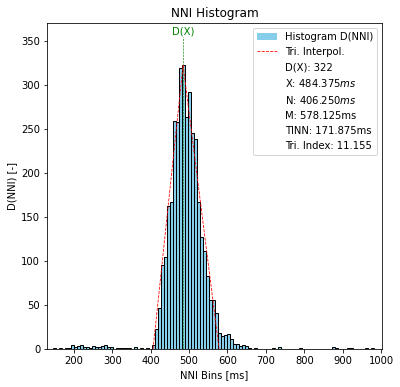

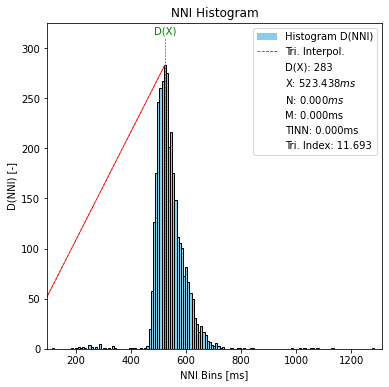

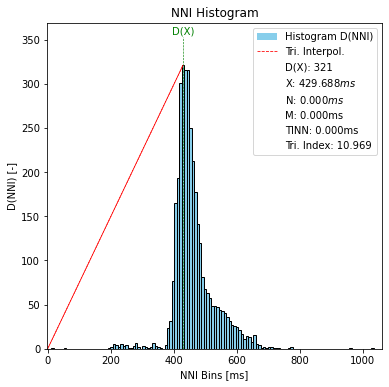

In [20]:
# Compute SDNN 
result_s1 = td.time_domain(nni_s1)
result_s2 = td.time_domain(nni_s2)
result_s3 = td.time_domain(nni_s3)
result_s4 = td.time_domain(nni_s4)

In [23]:
print(str(result_s1['rmssd']))
print(str(result_s2['rmssd']))
print(str(result_s3['rmssd']))
print(str(result_s4['rmssd']))

21.664238334518963
38.593440298646776
50.4797090701934
56.10217191144936


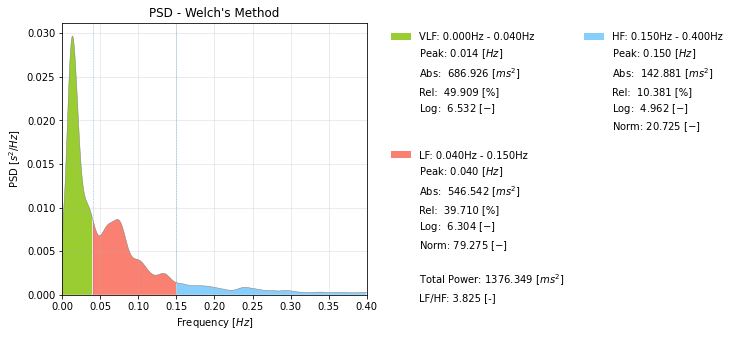

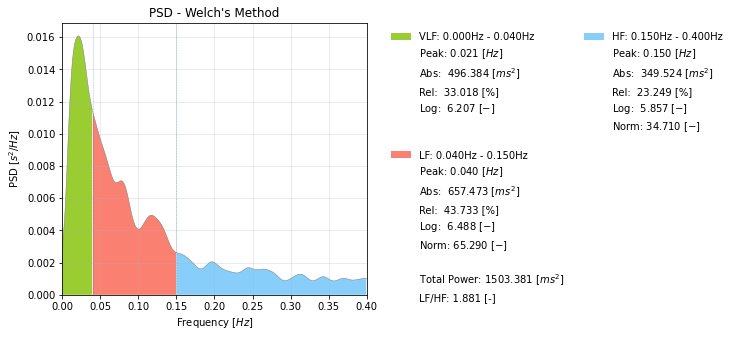

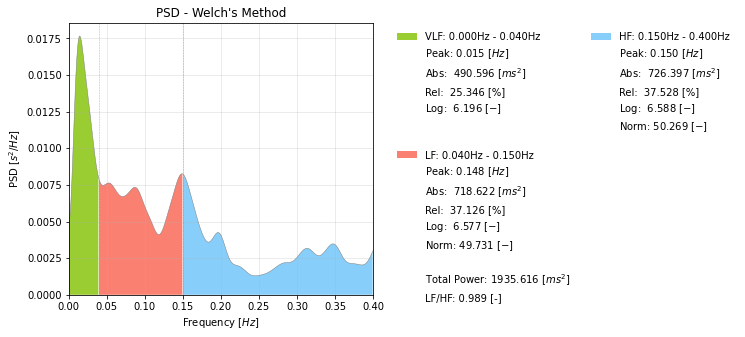

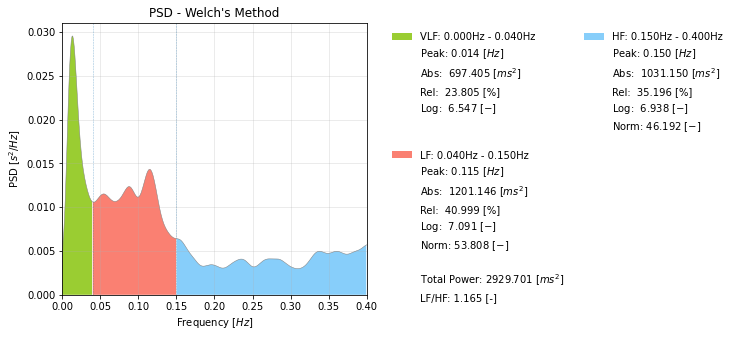

In [21]:
# Compute the PSD and frequency domain parameters 
result_psd_s1 = fd.welch_psd(nni=nni_s1) 
result_psd_s2 = fd.welch_psd(nni=nni_s2) 
result_psd_s3 = fd.welch_psd(nni=nni_s3) 
result_psd_s4 = fd.welch_psd(nni=nni_s4) 

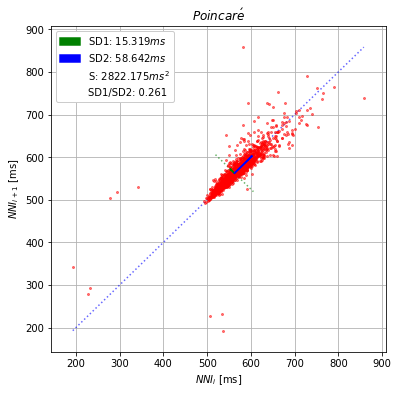

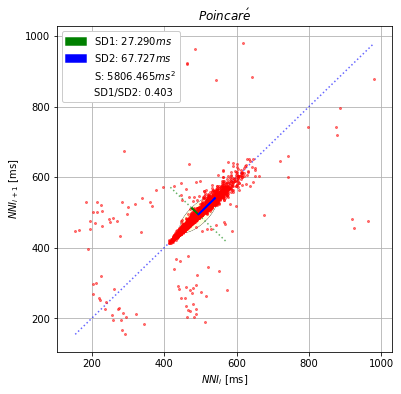

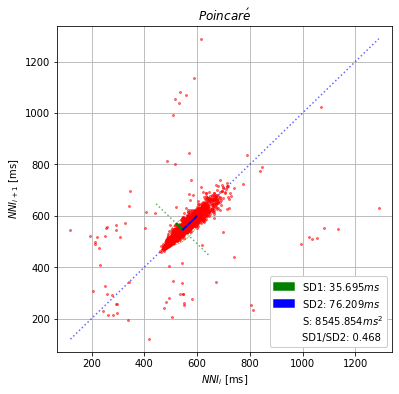

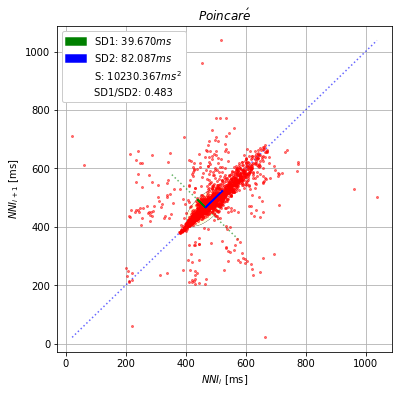

15.318925306910964
27.289679863468976
35.69453997156805
39.67022465931592


In [25]:
# Compute poincare 
result_poincare_s1 = nl.poincare(nni_s1) 
result_poincare_s2 = nl.poincare(nni_s2)
result_poincare_s3 = nl.poincare(nni_s3)
result_poincare_s4 = nl.poincare(nni_s4) 
 
# Access SD1 value using the key 'sd1' 
print(result_poincare_s1['sd1']) 
print(result_poincare_s2['sd1'])
print(result_poincare_s3['sd1']) 
print(result_poincare_s4['sd1'])

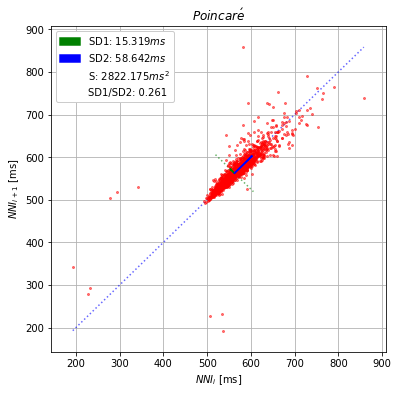

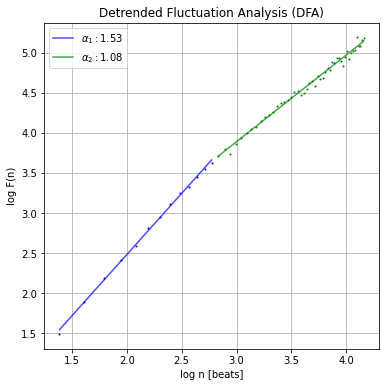

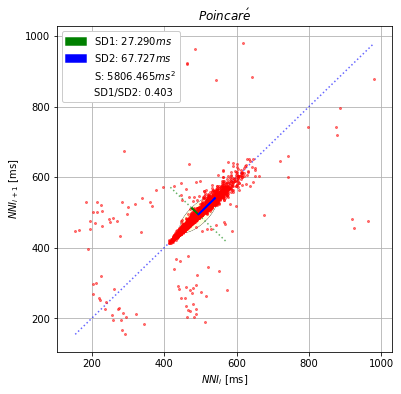

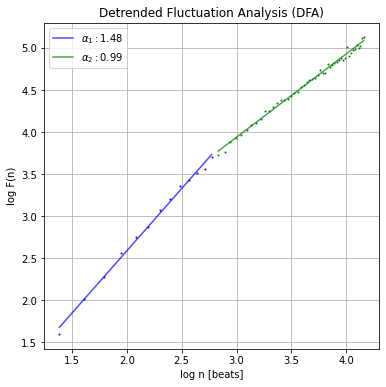

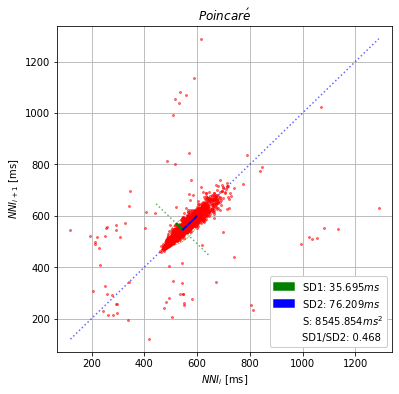

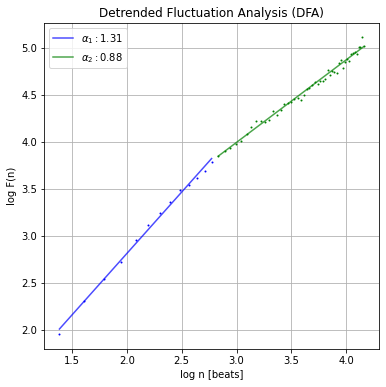

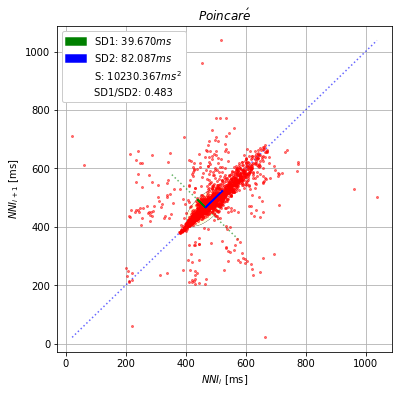

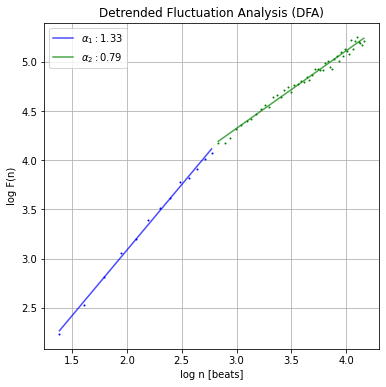

In [27]:
# Compute all non-linear at once 
result_nonlinear_s1 = nl.nonlinear(nni_s1) 
result_nonlinear_s2 = nl.nonlinear(nni_s2)
result_nonlinear_s3 = nl.nonlinear(nni_s3) 
result_nonlinear_s4 = nl.nonlinear(nni_s4)